In [3]:
import matplotlib.pyplot as plt

import matplotlib.ticker as plticker
import numpy as np
import math
import random

In [4]:
r= random.random()
print(r)
print(-1 ** round(r))

0.22206989666167143
-1


In [5]:
size = 5
i,j=0,0
x,y,u,v,directions,directionsList =[],[],[],[],[],[]
while i <= size:
    j=0
    directions.append([])
    while j<= size:
        dire = (-1) ** round(random.random())
        x.append(i)
        y.append(j)
        directions[i].append(dire)
        directionsList.append(dire)
        j=j+1
    i=i+1
for row in directions:
    for dire in row:
        u.append(0)
        v.append(dire)
for i in directions:
    print(i)
print(u)
print(v)

[-1, -1, 1, -1, -1, -1]
[1, -1, -1, -1, -1, -1]
[-1, 1, -1, 1, 1, 1]
[1, -1, -1, -1, 1, -1]
[-1, 1, 1, 1, -1, 1]
[-1, -1, -1, 1, 1, -1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1]


In [7]:
v2 = []
for i in v:
    v2.append(-i)

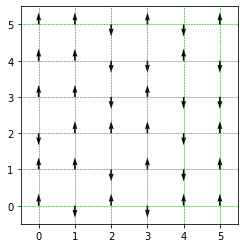

In [58]:
plt.quiver(x,y,u,v2)
plt.axis('scaled')
plt.axis([-0.5,5.5,-0.5,5.5])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.savefig('./NewIsing/IsingInverse.png',bbox_inches='tight',pad_inches = 0,transparent=True)

In [13]:
directions

[[-1, -1, 1, -1, -1, -1],
 [1, -1, -1, -1, -1, -1],
 [-1, 1, -1, 1, 1, 1],
 [1, -1, -1, -1, 1, -1],
 [-1, 1, 1, 1, -1, 1],
 [-1, -1, -1, 1, 1, -1]]

In [19]:
spinDown =[]
spinUp=[]

for i,val in enumerate(directions):
    for j,spin in enumerate(val):
        if spin == 1:
            spinUp.append((i,j))
        elif spin == -1:
            spinDown.append((i,j))
        else:
            print('here')

250


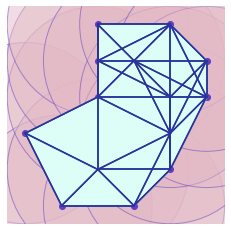

In [49]:
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Polygon,Circle
import numpy as np

def vrPlot(radius=250,clear=False):
    r = radius/100
    radius=str(radius)
    #points = [(1,2),(1,3),(2,4),(5,10),(6,9),(2,3),(4,3),(1,5),(1,2)]
    points = spinUp
    points2=spinDown
    xPoints=[]
    yPoints=[]


    print(radius)
    for i in points:
        x = i[0]
        y = i[1]
        xPoints.append(x)
        yPoints.append(y)
        circle = Circle((x,y),r,fc='#e3bac6',ec='#613dc1',alpha=0.5)
        plt.gca().add_patch(circle)
        connected = []
        for j in points:
            x2 = j[0]
            y2 = j[1]
            dis = math.sqrt((x-x2)**2+(y-y2)**2)
            #print(dis)
            if (dis > 0 and dis <= r):
                connected.append((x2,y2))
                line = plt.Line2D((x,x2),(y,y2),1.5,color='#29339b',zorder=4)
                plt.gca().add_line(line)
        for c in connected:
            xc = c[0]
            yc = c[1]
            for c2 in connected:
                xc2 = c2[0]
                yc2 = c2[1]
                dis = math.sqrt((xc-xc2)**2+(yc-yc2)**2)
                if (dis > 0 and dis <= r):
                    pts = np.array([[x,y],[xc,yc],[xc2,yc2]])
                    tri = Polygon(pts,closed=False,color='#ddfff7',alpha=0.6,zorder=2)
                    plt.gca().add_patch(tri)


    plt.axis('scaled')
    plt.axis('off')
    plt.scatter(xPoints,yPoints, color='#613dc1',zorder=2)
    plt.xlim([-0.5,5.5])
    plt.ylim([-0.5,5.5])

    plt.savefig('./NewIsing/IsingUp'+radius+'.png',bbox_inches='tight',pad_inches = 0,transparent=True)
    if clear:
        plt.clf()
vrPlot()

In [50]:
i = 0
while i < 250:
    vrPlot(i,True)
    i+=25

0
25
50
75
100
125
150
175
200
225


<Figure size 432x288 with 0 Axes>

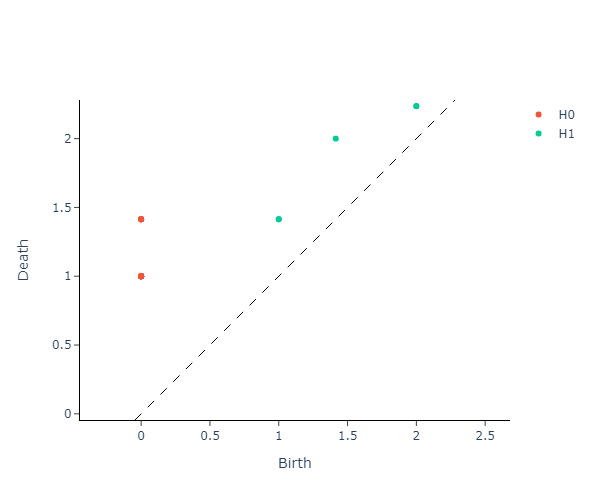

In [59]:
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram

VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])  # Parameter explained in the text
fitPoints = np.array(spinDown)
diagrams = VR.fit_transform([fitPoints])
plot_diagram(diagrams[0]).update_layout(paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')

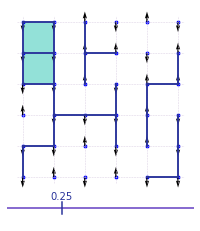

In [39]:
def twoAngleCompare(i1,j1,i2,j2,angles,close):
    if (0<=j2 <= size and 0 <= i2 <= size):
        if (abs(directions[i1][j1]-directions[i2][j2])/2<=close):
                line = plt.Line2D((i1,i2),(j1,j2),1.5,color='#29339b')
                plt.gca().add_line(line)
            
def squareCompare(i,j,change,change2,angles,close):
    sites = [(i,j),(i,j+change2),(i+change,j),(i+change,j+change2)]
    diffs = 0
    if (0<i+change <= size and 0< j+change2 <= size):
        for site1 in sites:
            for site2 in sites:  
                diff = abs(angles[site1[0]][site1[1]]-angles[site2[0]][site2[1]])
                diffs += diff
        ave = diffs/16
        if (close >= ave):
            rectangle = plt.Rectangle((i,j), change, change2, fc='#93e1d8',zorder=-1)
            plt.gca().add_patch(rectangle)


def filGrid(compare=25, clear=False):
    close=compare/100
    compare=str(compare)
    angleLineLength = size
    plt.scatter(x,y,color='blue',linewidths=0,s=15)
    plt.quiver(x,y,u,v)
    plt.axis('scaled')
    plt.axis('off')
    plt.axis([-0.5,size+0.5,-1.5,angleLineLength+0.5])
    
    plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
    
    l=0
    
    while (l <= size):
        axLine = plt.Line2D((l,l),(-0.2,size+0.2),linestyle = '--', linewidth = 0.5,color='#dacfe3')
        axLine2 = plt.Line2D((-0.2,size+0.2),(l,l),linestyle = '--', linewidth = 0.5,color='#dacfe3')
        plt.gca().add_line(axLine)
        plt.gca().add_line(axLine2)
        l+=1
        
    i=0
    while i <=size:
        j=0
        while j<=size:
            for change in [-1,1]:
                twoAngleCompare(i,j,i+change,j,directions,close)
                twoAngleCompare(i,j,i,j+change,directions,close)
                for change2 in [-1,1]:
                    squareCompare(i,j,change,change2,directions,close)
            j+=1
        i+=1
    l = 0
    
    anglePoint = (angleLineLength*((close)))
    angleLine = plt.Line2D((-1,angleLineLength+1),(-1,-1),1.5,color='#613dc1')
    angleMarker = plt.Line2D((anglePoint,anglePoint),(-1.2,-0.8),1.5,color='#29339b')
    plt.gca().add_line(angleLine)    
    plt.gca().add_line(angleMarker)
    plt.text(anglePoint,-0.7,round(close,2),horizontalalignment='center',color='#29339b')
    plt.savefig('./imagesVideo/fillGrid/FillGrid'+compare+'.png',bbox_inches='tight',pad_inches = 0,transparent=True)
    if clear:
        plt.clf()

filGrid()

In [99]:
i=0
while i <= 100:
    filGrid(i,True)
    i+= 1

/tmp/ipykernel_752/1032081200.py:4: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  line = plt.Line2D((i1,i2),(j1,j2),1.5,color='#29339b')
/tmp/ipykernel_752/1032081200.py:56: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleLine = plt.Line2D((-1,angleLineLength+1),(-1,-1),1.5,color='#613dc1')
/tmp/ipykernel_752/1032081200.py:57: MatplotlibDeprecationWarning: Passing the linewidth parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  angleMarker = plt.Line2D((anglePoint,anglePoint),(-1.2,-0.8),1.5,color='#29339b')


<Figure size 640x480 with 0 Axes>

In [67]:
import numpy as np
import gudhi as gd  

In [68]:
positions = np.array([[u, v] for u in x for v in y])
filt_values = np.array(directions)
filt_values

array([[-1,  1,  1, -1,  1,  1],
       [ 1,  1,  1,  1, -1,  1],
       [ 1, -1, -1,  1, -1,  1],
       [-1,  1, -1,  1, -1,  1],
       [-1, -1, -1, -1, -1, -1],
       [ 1,  1, -1, -1,  1,  1]])

In [69]:
cc_density_crater = gd.CubicalComplex(
    top_dimensional_cells = filt_values
)

In [70]:
cc_density_crater.cofaces_of_persistence_pairs()

AssertionError: compute_persistence() must be called before cofaces_of_persistence_pairs()

usetex mode requires dvipng.


<Axes: title={'center': 'Persistence barcode'}>

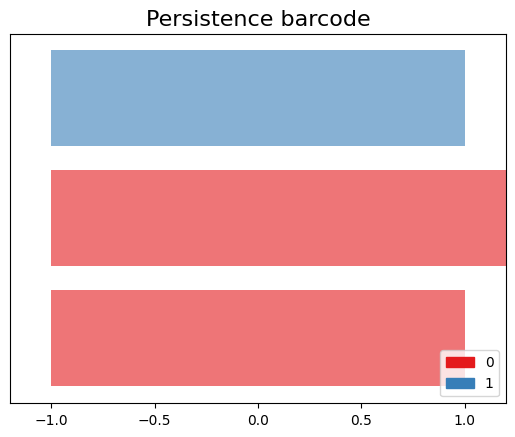

In [71]:
gd.plot_persistence_barcode(cc_density_crater.persistence(),legend=True)

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

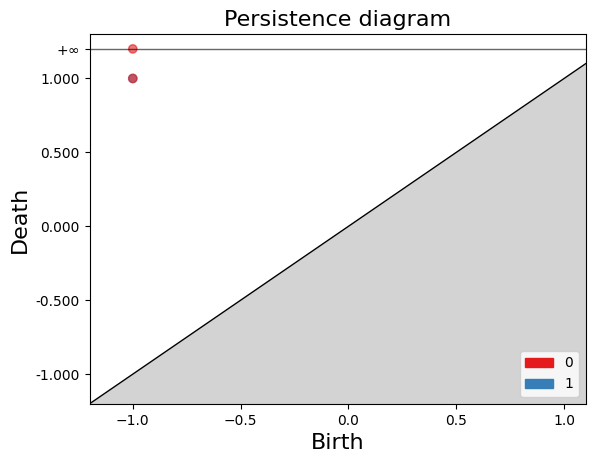

In [72]:
gd.plot_persistence_diagram(cc_density_crater.persistence(),legend=True)